## Seminar 3: Regression

### Maxim Panov


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Outline
- Introduction
- Linear regression
- Linear regression with nonlinear basis functions
- Nonlinear regression

### Outline
- **Introduction**
- Linear regression
- Linear regression with nonlinear basis functions
- Nonlinear regression

### Regression

- $X$, input - a description of some object;
- $Y$, output - a characteristic of object;
- $f$, dependency - some method of characteristic calculation based on object description;
- $\left(X, Y = f\left(X\right)\right)$ - observations;
- $S = \left\{X_i, Y_i\right\}_{i=1}^N$, training sample - a set of $N$ observations;
- $\hat f$, regression model - mathematical function which mimics original dependency $f$.

### Regression
- $X$ some $d_{in}$ - dimensional vector describing object design (e.g. geometry parameters of aircraft shape)
- $Y$ some $d_{out}$-dimensional vector of an object characteristics with description $X$ (e.g. lift and drag coefficients)
- The rule $f \colon \; X \mapsto Y$ (e.g. CFD code or experiments in wind tunnel)

![image](./figures/CFD_modified.png)

### Olympic Marathon Data

-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance. Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

![image](./figures/Stephen_Kiprotich.jpg)
Image from Wikimedia Commons <http://bit.ly/16kMKHQ>

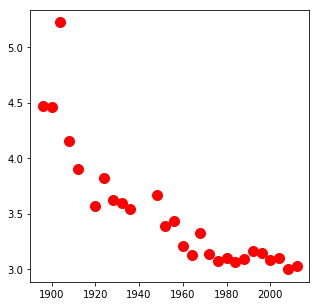

In [3]:
data = np.loadtxt('olympic_marathon_men.txt', delimiter=',')

X = data[:, 0]
Y = data[:, 1]

f, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, Y, 'ro', markersize=10)

### Outline
- Introduction
- **Linear regression**
- Linear regression with nonlinear basis functions
- Nonlinear regression

### Gaussian Density
![](./figures/gaussian_of_height.svg)
The Gaussian PDF with $\mu=1.7$ and variance $\sigma^2=
  0.0225$. Mean shown as red line. It could represent the heights of a population of
  students.

### Gaussian Density
$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)
$$
$\sigma^2$ is the variance of the density and $\mu$ is the mean.

### Two Important Gaussian Properties

**Sum of Gaussian**

-   Sum of Gaussian variables is also Gaussian.
    $$y_i \sim \mathcal{N}(\mu, \sigma^2)$$ 
    And the sum is distributed as
    $$\sum_{i=1}^{n} y_i \sim \mathcal{N}\left(\sum_{i=1}^n \mu_i,\sum_{i=1}^n \sigma_i^2\right)$$
    (*Aside*: As sum increases, sum of non-Gaussian, finite variance variables is
    also Gaussian [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).)

### Two Important Gaussian Properties

**Scaling a Gaussian**

-   Scaling a Gaussian leads to a Gaussian.
    $$y \sim \mathcal{N}(\mu, \sigma^2)$$
    And the scaled density is distributed as
    $$w y \sim \mathcal{N}(w\mu,w^2 \sigma^2)$$

### Laplace's Idea

### A Probabilistic Process

-   Set the mean of Gaussian to be a function.
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

-   This gives us a ‘noisy function’.

-   This is known as a stochastic process.

### Height as a Function of Weight

-   In the standard Gaussian, parametized by mean and variance.

-   Make the mean a linear function of an *input*.

-   This leads to a regression model. 
    \begin{align*}
       y_i=&f\left(x_i\right)+\epsilon_i,\\
         \epsilon_i \sim &\mathcal{N}(0, \sigma^2).
     \end{align*}
        
-   Assume $y_i$ is height and $x_i$ is weight.

### Data Point Likelihood

-   Likelihood of an individual data point
    $$p\left(y_i|x_i,m,c\right)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

-   Parameters are gradient, $m$, offset, $c$ of the function and noise
    variance $\sigma^2$.

### Data Set Likelihood

-   If the noise, $\epsilon_i$ is sampled independently for each
    data point.

-   Each data point is independent (given $m$ and $c$).

-   For independent variables:
    $$p(\mathbf{y}) = \prod_{i=1}^n p(y_i),$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n p(y_i|x_i, m, c).$$

### For Gaussian 

- i.i.d. assumption
    
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right),$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp \left(-\frac{\sum_{i=1}^n\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood Function

-   Normally work with the log likelihood:
    $$L(m,c,\sigma^{2})=-\frac{n}{2}\log 2\pi -\frac{n}{2}\log \sigma^2 -\sum _{i=1}^{n}\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}.$$

### Connection: Sum of Squares Error

-   Ignoring terms which don’t depend on $m$ and $c$ gives
    $$E(m, c) \propto \sum_{i=1}^n (y_i - f(x_i))^2,$$
    where $f(x_i) = mx_i + c$.

-   This is known as the *sum of squares* error function.

-   Commonly used and is closely associated with the
    Gaussian likelihood.

### Learning is Optimization

-   Learning is minimization of the cost function.

-   At the minima the gradient is zero.

-   Coordinate ascent, find gradient in each coordinate and set to zero.

### Multi-dimensional Inputs

-   Multivariate functions involve more than one input.

-   Height might be a function of weight and gender.

-   There could be other contributory factors.

-   Place these factors in a feature vector $\mathbf{x}_i$.

-   Linear function is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^p w_j x_{i, j} + c.$$

### Vector Notation

-   Write in vector notation
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{x}_i + c.$$
-   Can absorb $c$ into $\mathbf{w}$ by assuming extra input $x_0$
    which is always 1:
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{x}_i.$$

### Log Likelihood for Multivariate Regression

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}\right).$$

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}.$$

-   And a corresponding error function of
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}.$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}.$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\mathbf{x}_i\right)^{2}}{n}.$$

### Outline
- Introduction
- Linear regression
- **Linear regression with nonlinear basis functions**
- Nonlinear regression

### Linear Regression with nonlinear basis functions

-   Problem with Linear Regression — $\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}).$$

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\boldsymbol{\phi} = [1, x, x^2].$$
    
![image](./figures/polynomial_basis003.svg)
    


### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_0} + {\color{\magentaColor}w_1x} + {\color{\blueColor}w_2 x^2}.$$


![image](./figures/polynomial_function003.svg)


### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right).$$
    
    ![image](./figures/radial_basis003.svg)


### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}.$$

![image](./figures/radial_function003.svg)

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}.$$


## Vector Notation

-   Write in vector notation:
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i.$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\boldsymbol{\phi}_i\\ &+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\mathbf{w} +\text{const}.\end{align}$$
 

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top = \boldsymbol{\Phi}^\top \boldsymbol{\Phi};$$
$$\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i = \boldsymbol{\Phi}^\top \mathbf{y}.$$

### Update Equations

-   Update for $\mathbf{w}^{*}$:
    $$\mathbf{w}^{*} = \left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}.$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\boldsymbol{\phi}_i\right)^{2}}{n}.$$

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis001.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis002.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis003.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis004.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis005.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis006.svg)

### Polynomial Fits to Olympic Data
![image](./figures/olympic_LM_polynomial_num_basis007.svg)

### Bias Variance Decomposition

Expected test error for different variations of the *training data* sampled from, $\Pr(\mathbf{x}, y)$

$$\mathbb{E}\left[ (y - f^*(\mathbf{x}))^2 \right].$$

Decompose as

$$\mathbb{E}\left[ (y - f(\mathbf{x}))^2 \right] = \text{bias}\left[f^*(\mathbf{x})\right]^2 + \text{variance}\left[f^*(\mathbf{x})\right] +\sigma^2.$$

### Bias

- Given by
    $$\text{bias}\left[f^*(\mathbf{x})\right] = \mathbb{E}\left[f^*(\mathbf{x})\right] - f(\mathbf{x}).$$
    
- Error due to bias comes from a model that's too simple.

### Variance

- Given by
    $$\text{variance}\left[f^*(\mathbf{x})\right] = \mathbb{E}\left[\left(f^*(\mathbf{x}) -  \mathbb{E}\left[f^*(\mathbf{x})\right]\right)^2\right].$$
    
- Slight variations in the training set cause changes in the prediction. Error due to variance is error in the model due to an overly complex model. 

### Outline
- Introduction
- Linear regression
- Linear regression with nonlinear basis functions
- **Nonlinear regression**

There are many methods doing nonlinear regression:
- Neural networks
- Support-vector regression
- Nearest neighbours
- Gaussian process regression
- Regression trees and forests
- ...

Many of them are doing almost the same as linear regression:
$$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}, \theta_j).$$

### Example: Artificial Linear data
Let's create artificial linear data set 
$$ y = a + bx$$


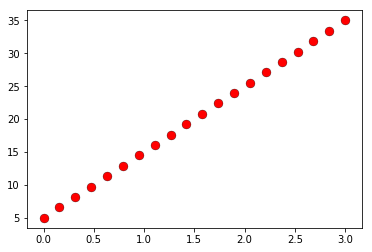

In [4]:
a = 5
b = 10
n_points = 20
x_min = 0
x_max = 3

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
y = a + b * x

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);


Assuming we do not know actual values of $a$ and $b$,
how to find them if we only observe $x$ and $y$?

The answer is Normal Equation:

$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y},$$

where: $$\mathbf{w} = [a, b]$$ $$\mathbf{X} = [1, x] $$

Then, using these parameters we can model $y's$ as follow:
$$\mathbf{y} = \mathbf{w}^\top \mathbf{X}$$


Computed line parameters:

w[0] = 9.999999999999998
w[1] = 5.000000000000011       

Actual line parameters:
 
b = 10
a = 5


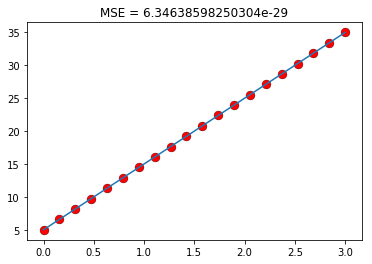

In [5]:

X = np.concatenate([np.ones((n_points,1)), x], axis=1) # add intercept term

w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # compute w

# .dot() is just a matrix multiplication
# np.linalg.inv(X) returns inverse of X

print('Computed line parameters:\n\nw[0] = {}\nw[1] = {}\
       \n\nActual line parameters:\n \nb = {}\na = {}'\
       .format(w[1][0], w[0][0], b,a))

y_regression = X.dot(w) # compute predicted y

# Now let's see how could we measure the
# goodness of the fit numerically

# y_regression stores predicted values
# y stores original values
# use Mean Squared Error (MSE)
# which is nothing but SSE / n_points

def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x, y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

In [6]:
# define simple linear regression
def simple_linear_regression(X,y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(w), w

Not too interesting, let's add some white noise:
$$ y = a + bx + \mathcal{N}(0, 1)$$

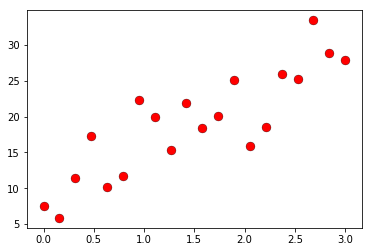

In [7]:
a = 5
b = 10
n_points = 20
x_min = 0
x_max = 3

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 42
rs = np.random.RandomState(completely_random_number) # Just for reproducibility 
noise = rs.normal(0, 5, (n_points, 1))

y_noised = a + b * x + noise
plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);

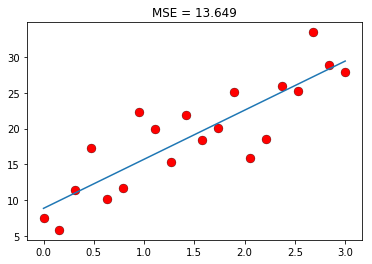

In [8]:
### With noise

X = np.concatenate([np.ones((n_points,1)), x], axis=1)

y_regression, w = simple_linear_regression(X, y_noised)


plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x, y_regression);
plt.title('MSE = {}'.format(np.round(mean_squared_error(y_noised, y_regression), 3)));

### Example: Artificial Non-linear data
Let's create artificial non-linear data set 
$$ y = a + bx + cx^2$$


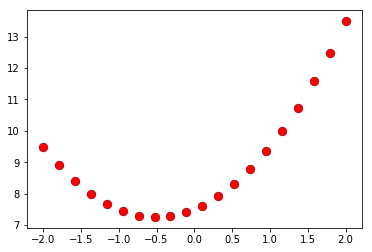

In [9]:
a = 7.5
b = 1
c = 1

n_points = 20
x_min = -2
x_max = 2

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
y = a + b * x  + c * x**2

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);

### Let's try to find best (in terms of least squares) linear approximation
$$y = a + bx = \mathbf{w}^\top \mathbf{X}$$

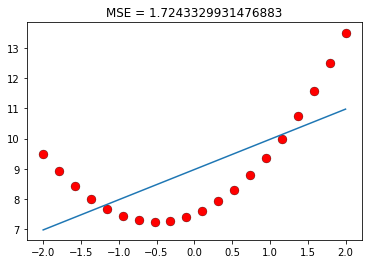

In [10]:
X = np.concatenate([np.ones((n_points,1)), x], axis=1) # add intercept term
y_regression, w = simple_linear_regression(X, y)


plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

We can do better by adding non-linear features!

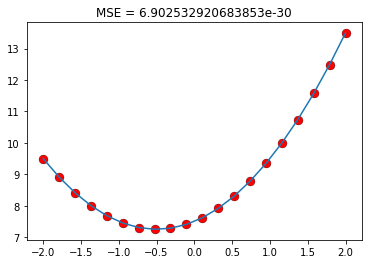

In [11]:
X = np.concatenate([np.ones((n_points,1)), x, x**2], axis=1) # add intercept term and x**2 term

y_regression, w = simple_linear_regression(X, y)


plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

- print $X$ watch out how it changes, compare with the linear case!
- print $w$ compare it with parameters of generator

### Example: Olympic data

In [12]:
data = np.loadtxt('olympic_marathon_men.txt', delimiter=',')

x = data[:, 0][:, np.newaxis]
y = data[:, 1][:, np.newaxis]

n_points = x.shape[0]

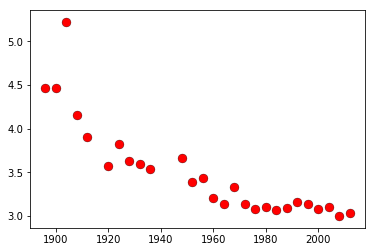

In [13]:
plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);

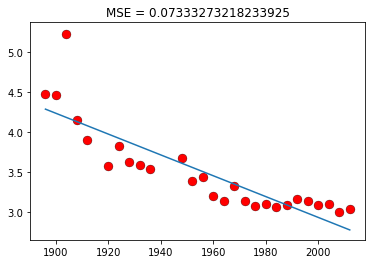

In [14]:
X = np.concatenate([np.ones((n_points,1)), x], axis=1)

y_regression, w = simple_linear_regression(X, y)

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

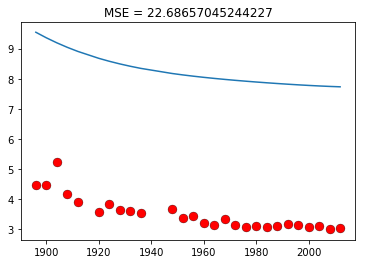

In [15]:
X = np.concatenate([np.ones((n_points,1)), x, x**2, x**3, x**4, x**5, x**6], axis=1)

y_regression, w = simple_linear_regression(X, y)

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

### Oups, forgot about z-scoring

spoiler: Never forgot about z-scoring!

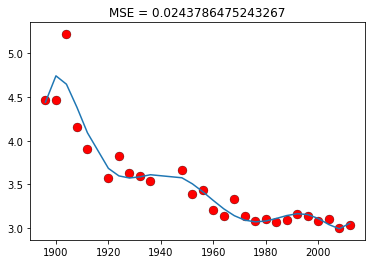

In [16]:
mean = x.mean()
std = x.std()

zscored_x = (x - mean)/std

# add intercept and polynomial features
X = np.concatenate([np.ones((n_points,1)), zscored_x,              
                    zscored_x**2, zscored_x**3, zscored_x**4,
                    zscored_x**5, zscored_x**6, zscored_x**7], axis=1)

y_regression, w = simple_linear_regression(X, y)

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

### So far it seems that our regression problem is solved, isn't it?
Let's see
### Example: Tricky one

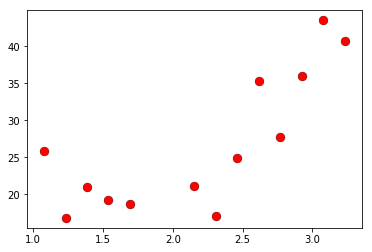

In [74]:
x = np.array([[ 1.07692308,  1.23076923,  1.38461538,  1.53846154,  1.69230769,
                2.15384615,  2.30769231,  2.46153846,  2.61538462,  2.76923077,
                2.92307692,  3.07692308,  3.23076923]]).T

y = np.array([[ 25.82314364,  16.82377152,  20.95716215,  19.25730757,
                18.73336146,  21.1140599 ,  17.04729894,  24.85928959,
                35.31871209,  27.69126686,  35.94808295,  43.49938208,
                40.75809703]]).T

n_points = 13

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);

In [75]:
def simple_plot(x, y, y_regression):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

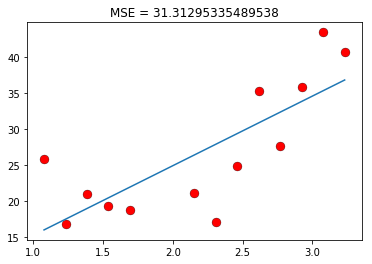

In [77]:
# Linear fit
X = np.concatenate([np.ones((n_points,1)), x], axis=1)

y_regression, w = simple_linear_regression(X, y)
simple_plot(x, y , y_regression)

# MSE = 31.31295

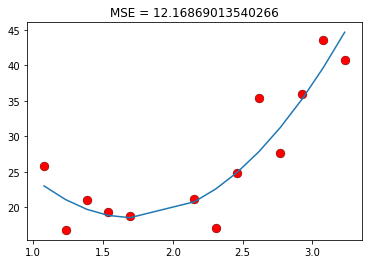

In [139]:
# Let's do "better", add x**2 feature

X = np.concatenate([np.ones((n_points,1)), x, x**2], axis=1)

y_regression, w = simple_linear_regression(X, y)
simple_plot(x, y , y_regression)

#MSE = 12.16869

###  MSE = 12.16869 seems much better than 31.31295 right?

Not really if I told you that the real function wich produce such x'es and y's
is linear function with some white noise

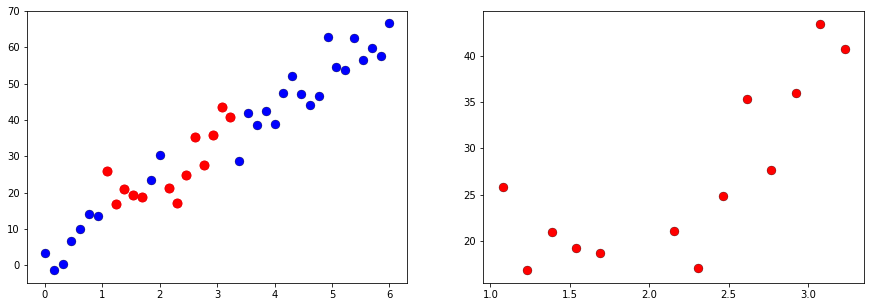

In [140]:
a = 5
b = 10
n_points = 40
x_min = 0
x_max = 6

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 33
rs = np.random.RandomState(completely_random_number) # Just for reproducibility 
noise = rs.normal(0, 5, (n_points, 1))

y_noised = a + b * x + noise
idx = np.array([7,8,9,10,11,14,15,16,17,18,19,20,21])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x,y_noised, s=80, c ='b', edgecolors='k', linewidths=0.3);
plt.scatter(x[idx],y_noised[idx], s=80, c='r');
plt.subplot(1,2,2)
plt.scatter(x[idx],y_noised[idx], s=80, c ='r', edgecolors='k', linewidths=0.3);

In [141]:
_x = x[idx]
y = y_noised[idx]
n_points = 13

Now if use whole data to compare our "best model" which achieve MSE = 3.3244 on red points, with simple linear model (MSE=31.31295 on red points) we will see the difference. 


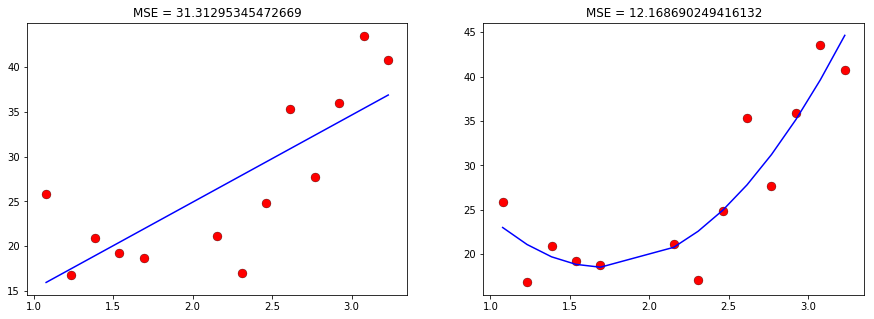

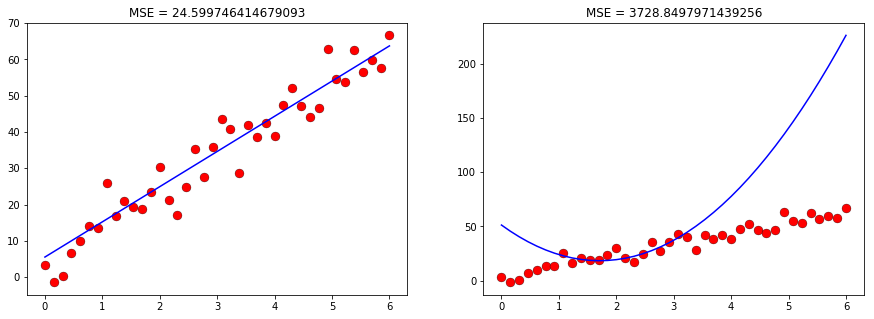

In [143]:
# TRAIN
# Linear fit

X = np.concatenate([np.ones((n_points,1)), _x], axis=1)

y_regression, w = simple_linear_regression(X, y)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(_x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(_x,y_regression, color='b');
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

# Poly fit
X = np.concatenate([np.ones((n_points,1)), _x, _x**2], axis=1)

y_regression, w = simple_linear_regression(X, y)
plt.subplot(1,2,2)
plt.scatter(_x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(_x,y_regression, color='b');
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

# TRAIN
# Linear fit

X = np.concatenate([np.ones((n_points,1)), _x], axis=1)

_, w = simple_linear_regression(X, y)

X = np.concatenate([np.ones((40, 1)), x], axis=1)

y_regression = X.dot(w)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression, color='b');
plt.title('MSE = {}'.format(mean_squared_error(y_noised, y_regression)));

# Poly fit
X = np.concatenate([np.ones((n_points,1)), _x, _x**2], axis=1)

_, w = simple_linear_regression(X, y)
X = np.concatenate([np.ones((40,1)), x, x**2], axis=1)




y_regression = X.dot(w)


plt.subplot(1,2,2)
plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x,y_regression, color='b');
plt.title('MSE = {}'.format(mean_squared_error(y_noised, y_regression)));



### This is what we call overfitting, it will be explained deeper in the next Seminar,

but for now you should know that always, no, ALWAYS, no


# ALWAYS!!!

When you build a regression (or classification) model you
MUST split your data into : train-validation-test,
or atleast train-test subsets. Or use such techniques as Cross-Valdiation,
or Random-Sampling, which were created for same purposes, to avoid overfitting.

### Example: diabetes dataset

- The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure).
- Measurements are made on 442 patients.
- Output is an indication of disease progression after one year.



In [15]:
from sklearn import datasets, linear_model, cross_validation
from sklearn.gaussian_process import GaussianProcess
from sklearn.cross_validation import cross_val_score, KFold

In [26]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

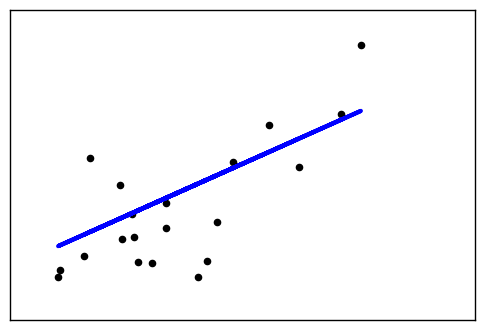

In [18]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [25]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

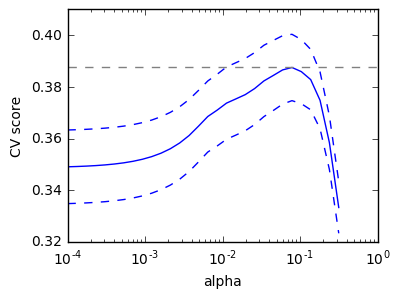

In [20]:
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [21]:
# Load the dataset from scikit's data sets
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Instanciate a GP model
gp = GaussianProcess(regr='constant', corr='absolute_exponential',
                     theta0=[1e-4] * 10, thetaL=[1e-12] * 10,
                     thetaU=[1e-2] * 10, nugget=1e-2, optimizer='Welch')

# Fit the GP model to the data performing maximum likelihood estimation
gp.fit(X, y)

C:\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda\envs\py3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anacond

GaussianProcess(beta0=None,
        corr=<function absolute_exponential at 0x00000255CE01C0D0>,
        normalize=True, nugget=array(0.01), optimizer='Welch',
        random_start=1,
        random_state=<mtrand.RandomState object at 0x00000255C9A67B40>,
        regr=<function constant at 0x00000255CE00EC80>,
        storage_mode='full',
        theta0=array([[ 0.0001,  0.0001,  0.0001,  0.0001,  0.0001,  0.0001,  0.0001,
         0.0001,  0.0001,  0.0001]]),
        thetaL=array([[  1.00000e-12,   1.00000e-12,   1.00000e-12,   1.00000e-12,
          1.00000e-12,   1.00000e-12,   1.00000e-12,   1.00000e-12,
          1.00000e-12,   1.00000e-12]]),
        thetaU=array([[ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01]]),
        verbose=False)

In [22]:
# Deactivate maximum likelihood estimation for the cross-validation loop
gp.theta0 = gp.theta_  # Given correlation parameter = MLE
gp.thetaL, gp.thetaU = None, None  # None bounds deactivate MLE

In [23]:
# Perform a cross-validation estimate of the coefficient of determination using
# the cross_validation module using all CPUs available on the machine
K = 20  # folds
R2 = cross_val_score(gp, X, y=y, cv=KFold(y.size, K), n_jobs=1).mean()
print("The %d-Folds estimate of the coefficient of determination is R2 = %s"
      % (K, R2))

The 20-Folds estimate of the coefficient of determination is R2 = 0.436226323026


#### Literature

- All of Statistics: A Concise Course in Statistical Inference by Larry Wassermann, Springer.
- The Elements of Statistical Learning, 2nd edition by Hastie, Tibshirani and Friedman, Springer-Verlag, 2008 (available online).
- Pattern Recognition and Machine Learning by Bishop, Springer, 2006.  
- Machine Learning: A Probabilistic Perspective by Kevin P. Murphy, MIT Press, 2012.


 